# Implementing our cost Function (Mean Square Error) in our Miniflow

# Mean Square Error
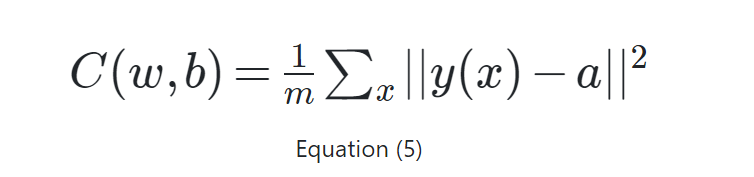
Here w denotes the collection of all weights in the network, b all the biases, m is the total number of training examples, and a is the approximation of y(x) by the network. Note that both a and y(x) are vectors of the same length.



In [3]:
class Node:
    def __init__(self, inbound_nodes = []):
        self.inbound_nodes = inbound_nodes
        self. outbound_nodes = []
        self.value = None
        for n in inbound_nodes:
            n.outbound_nodes.append(self)
        def forward():
            raise NotImplemented
            
class Input(Node):
    def __init__ (self):
        Node.__init__(self,[])

    def forward(self):
        pass

# class Linear(Node):
#     def __init__(self, X, W, b):
#         Node.__init__(self,[X, W, b])
        
#     def forward(self):
#         X = self.inbound_nodes[0].value
#         Y = self.inbound_nodes[1].value
#         b = self.inbound_nodes[2].value
#         self.value = np.dot(X,Y) + b
        
# class Sigmoid(Node):
#     def __init__(self,node):
#         Node.__init__(self,[node])
    
#     def _sigmoid(self,x):
#         return 1/1+np.exp(-1)
    
#     def forward(self):
#         x = self.inbound_nodes[0].value
#         self.value = self._sigmoid(x)

    
class MSE(Node):
    def __init__ (self, *args):
        Node.__init__(self, args)
    
    def forward(self):
        # NOTE: We reshape these to avoid possible matrix/vector broadcast
        # errors.
        #
        # For example, if we subtract an array of shape (3,) from an array of shape
        # (3,1) we get an array of shape(3,3) as the result when we want
        # an array of shape (3,1) instead.
        #
        # Making both arrays (3,1) insures the result is (3,1) and does
        # an elementwise subtraction as expected
        y = self.inbound_nodes[0].value.reshape(-1, 1)
        a = self.inbound_nodes[1].value.reshape(-1, 1)
        m = self.inbound_nodes[0].value.shape[0]
        # self.value = np.sum(np.square(y-a))/m
        diff = y - a
        self.value = np.mean(diff**2)


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L

def forward_pass(graph):
    for n in graph:
        n.forward()
    return n.value
    
        
        


In [6]:
"""
Testing our MSE method with this script!

"""

import numpy as np
#from miniflow import *

y, a = Input(), Input()
cost = MSE(y, a)

y_ = np.array([1, 2, 3])
a_ = np.array([4.5, 5, 10])

feed_dict = {y: y_, a: a_}
graph = topological_sort(feed_dict)
# forward pass
forward_pass(graph)

"""
Expected output

23.4166666667
"""
print(cost.value)


23.416666666666668
